1. 잔차분석
- 잔차가 정규분포를 따르는 지, 등분산성을 만족하는 지, 독립성을 가지는 지 등을 확인
2. 이상치분석
- Cook's distance, DFFITS, DFBETAS 등을 이용하여 이상치를 찾음

## 1. 잔차분석

잔차 플롯(Residual Plot)
- 통상적으로 4개의 서브 플롯으로 작성함
- 통계프로그램에 따라 개요가 다름
- Q-Q Plot, Residual Plot, Histogram of Residuals, Scale-Location Plot

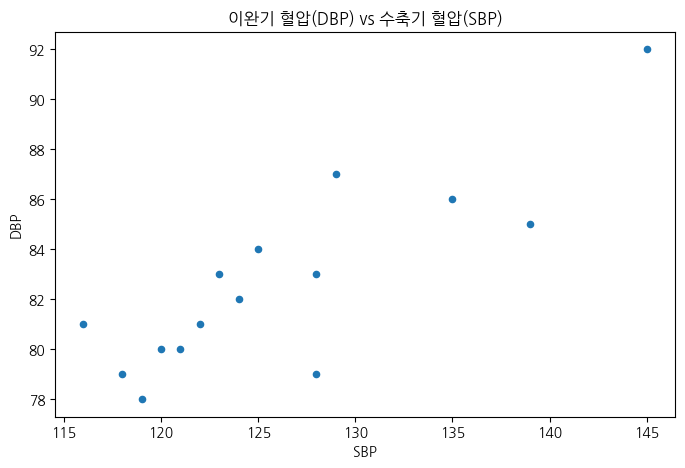

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import koreanize_matplotlib

pd.options.display.float_format='{:.2f}'.format
plt.rcParams['figure.figsize']=[8,5]

np.random.seed(42)

df=pd.DataFrame({
    'SBP': [121, 135, 119, 124, 118, 122, 120, 123, 129, 125, 128, 145, 139, 116, 128],
    'DBP': [80, 86, 78, 82, 79, 81, 80, 83, 87, 84, 83, 92, 85, 81, 79]
})
df.plot(
    kind='scatter',
    x='SBP',
    y='DBP',
    title='이완기 혈압(DBP) vs 수축기 혈압(SBP)'
);

In [39]:
formula='DBP~SBP'
model=smf.ols(formula,data=df).fit()

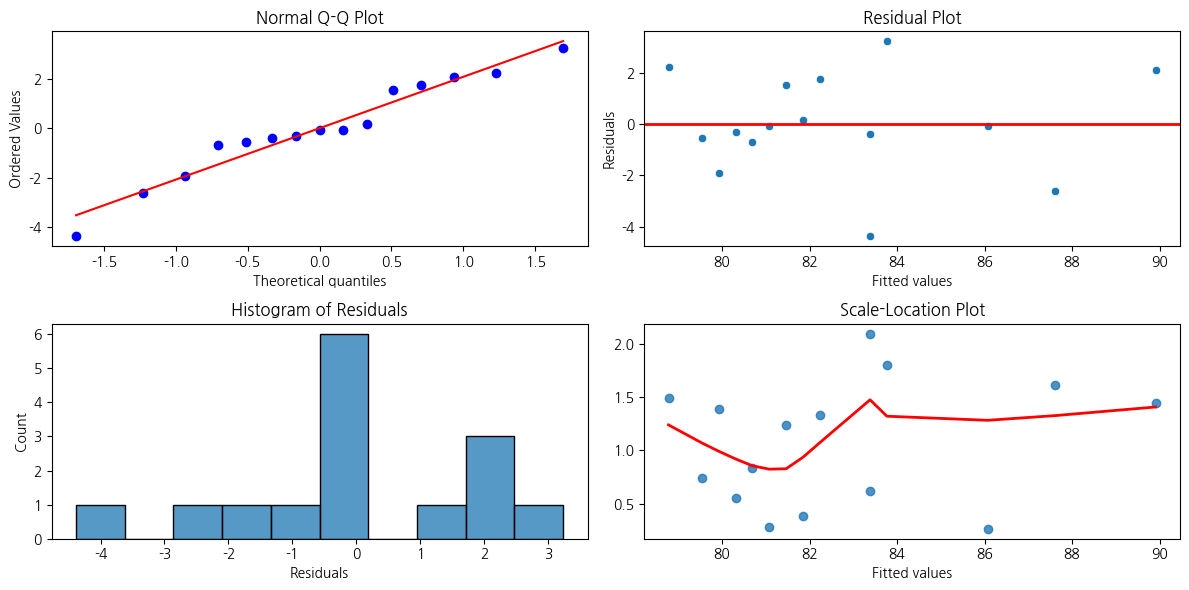

In [40]:
def plotResiduals(model):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import scipy.stats as stats

    fig, ax=plt.subplots(2,2,figsize=(12,6))
    resid=np.array(model.resid)
    fitted=np.array(model.fittedvalues)
    #Q-Q plot
    stats.probplot(
        resid,
        dist=stats.norm, #기준 분포는 정규분포
        sparams=(0,1),#정규분포의 평균과 표준편차
        plot=ax[0,0]
    )
    ax[0,0].set_title("Normal Q-Q Plot")

    #Residual Plot
    sns.scatterplot(
        x=fitted,
        y=resid,
        ax=ax[0,1]
    )
    ax[0,1].axhline(0,color='red', linewidth=2)
    ax[0,1].set_xlabel("Fitted values")
    ax[0,1].set_ylabel("Residuals")
    ax[0,1].set_title("Residual Plot")

    #Histogram
    sns.histplot(
        resid,
        bins=10,
        ax=ax[1,0]
    )
    ax[1,0].set_xlabel("Residuals")
    ax[1,0].set_title("Histogram of Residuals")

    #Scale-Location Plot
    sns.regplot(
        x=fitted,
        y=np.sqrt(np.abs(resid)), #잔차에 절댓값을 씌운 후 제곱근을 구함
        scatter=True,
        lowess=True,#데이터들을 따라가면서 그리는 것
        line_kws={'color':'red','lw':2},
        ax=ax[1,1]
    )
    ax[1,1].set_xlabel("Fitted values")
    ax[1,1].set_title("Scale-Location Plot")

    plt.tight_layout()
plotResiduals(model)

- Q-Q plot
    - 기준선에 데이터가 인접해 있으므로 정규성을 만족한다
- Residual Plot
    - 기준선을 중심으로 랜덤하게 잘 퍼져 있으므로 선형성을 만족한다
- Histogram of Residuals
    - 특징적인 패턴이 없으므로 독립성을 만족한다
- Scale-Location Plot
    - lowess 회귀선을 기준으로 데이터들이 몰리지 않고 패턴도 없으므로 등분산성을 만족한다


In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DBP   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     31.85
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           8.01e-05
Time:                        22:38:34   Log-Likelihood:                -31.169
No. Observations:                  15   AIC:                             66.34
Df Residuals:                      13   BIC:                             67.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2476      8.596      3.984      0.0

c:\Users\paint\anaconda3\envs\stat\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


- Omnibus:	1.018
    - 옴니버스 테스트는 통계 모형에 대한 전체적인 것을 검정하는 것
- Prob(Omnibus):	0.601
    - 잔차의 `정규성 검정`(Prob가 유의수준보다 크면 정규분포)
    - 현재 잔차가 정규분포
- Skew:	-0.430	
    - 잔차의 왜도, `정규분포일 때 Skew=0` 
    - 현재 잔차가 정규분포를 따름
- Kurtosis:	2.855
    - 잔차의 첨도, `정규분포일 때 Kurt=3`
    - 현재 잔차가 정규분포를 따름
- Durbin-Watson:	 2.091
    - 잔차의 `자기상관(독립성) 검정`
    - 2에 가까우면(1~3) 독립적, 0과 4에 가까우면 자기상관 있음
    - 현재 잔차는 독립적임
- Prob(JB):	0.788
    - 잔차의 `자기상관(독립성) 검정`
    - Prob가 유의수준보다 크면 독립적
    - 현재 잔차는 독립적임
- Cond. No.	2.03e+03 >30
    - `다중공선성을 나타내는 지표`
    - 30미만이면 다중공선성 없음
    - 현재는 독립변수가 1개 뿐이므로 다중공선성 문제 없음

Notes:      
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.     
- 표준오차는 오차의 공분산 행렬이 올바르게 지정되었다고 가정합니다.   

[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.       
- Cond.No가 커서 강한 다중공선성 또는 다른 수치적 문제가 있음을 나타낼 수 있습니다

c:\Users\paint\anaconda3\envs\stat\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.     
  return hypotest_fun_in(*args, **kwds)  
- 'kurtosistest' p-값은 관찰치가 20개 미만인 경우 부정확할 수 있습니다. n=15개의 관찰치만 제공되었습니다   

여기는 다중회귀분석에서 또 볼 내용
- Covariance Type:	nonrobust	
    - 계수 추정에 사용한 공분산 유형, 이분산일 시에는 이분상성에 강한 공분산 유형을 지정할 수 있음
- AIC:	222.5
    - Akaike Information Criterion, 모형의 복잡성 평가 지표로 작을수록 좋은 모형
- BIC:	225.3
    - Bayesian Information Criterion, 모형의 복잡성 평가 지표로 작을수록 좋은 모형
    - AIC보다 변수개수에 민감

- Cond. No.	2.03e+03
    - 회귀행렬의 조건 수, 외생 변수의 가장 큰 특이값과 가장 작은 특이값의 비율로서 다중공선성을 나타내는 지표
    - 30미만이면 다중공선성 없음

## 2. 이상치분석
- 이상치
    - 잔차가 큰 데이터
- 레버리지
    - 회귀 계수에 큰 영향을 미치는 데이터
- 영향점
    - 제거시 회귀 분석 결과(결정계수 $R^2$)에 큰 영향을 미치는 데이터
- 동시에 이상치, 레버리지, 영향점일 수 있기 때문에 묶어서 이상치라고 칭함

statsmodel 라이브러리의 get_influence() 함수로 영향점을 계산할 수 있음

In [42]:
# 이상치를 시각화하는 함수 정의
def showOutlier(df, x, y, model, outliers, title='이완기 혈압(DBP) vs. 수축기 혈압(SBP)'):

    # 산점도 그래프
    df.plot(
        kind='scatter',
        x=x,
        y=y,
        title=title
    )

    # 이상치 표시
    for outlier in outliers:
        plt.scatter(df[x][outlier], df[y][outlier], color='r')

    # 회귀선 그리기
    plt.plot(df[x], model.fittedvalues, color='red')

    # 산점도에 인덱스를 표시
    for i in df.index:
        plt.text(df[x][i], df[y][i], i, fontsize=12)

    plt.show()


In [43]:
import numpy as np
infl=model.get_influence()
infl.summary_frame()

,dfb_Intercept,dfb_SBP,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.07,0.06,0.01,-0.35,0.09,-0.11,-0.34,-0.11
1,0.01,-0.01,0.00,-0.04,0.15,-0.02,-0.04,-0.01
2,-0.26,0.25,0.07,-0.99,0.12,-0.37,-0.99,-0.37
3,0.01,-0.01,0.00,0.08,0.07,0.02,0.07,0.02
4,-0.08,0.08,0.01,-0.28,0.14,-0.11,-0.27,-0.11
5,-0.01,0.01,0.00,-0.04,0.09,-0.01,-0.04,-0.01
6,-0.04,0.03,0.00,-0.16,0.11,-0.06,-0.15,-0.05
7,0.09,-0.08,0.02,0.77,0.08,0.22,0.76,0.22
8,-0.14,0.17,0.11,1.62,0.08,0.46,1.74,0.50
9,0.05,-0.03,0.03,0.88,0.07,0.24,0.87,0.24


독립변수 관점의 이상치 탐색
- 레버리지
    - 독립변수의 각 관측치가 평균에서 떨어진 정도를 반영하는 통계량
    - 0과 1 사이의 값을 가지며, 일반적으로 레버리지 평균의 2~4배를 초과하는 관측치를 이상치로 정의
    - 레버리지 계산은 hat_matrix_diag 로 가능

Leverage: 
 [0.09494848 0.15104465 0.12127934 0.07155123 0.13766457 0.08500286
 0.10704064 0.07720378 0.07548655 0.06804522 0.07040641 0.44869777
 0.24434745 0.17687464 0.07040641]
Outliers using Leverage: 
     SBP  DBP
11  145   92


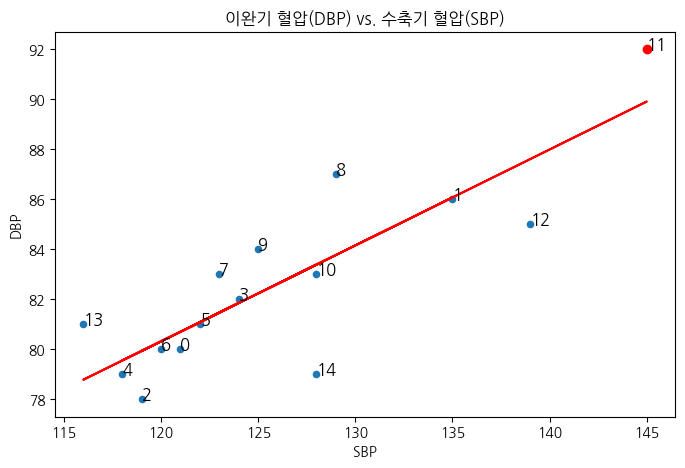

In [45]:
leverage=infl.hat_matrix_diag
print('Leverage: \n', leverage)
#레버리지의 평균 : mean(leverage)
#레버리지 평균의 2배보다 큰 레버리지를 가지는 관측치를 이상치로 정의해 인덱스 추출
outliers=np.where(leverage>2*np.mean(leverage))[0]
print('Outliers using Leverage: \n', df.iloc[outliers])
showOutlier(df,'SBP','DBP', model, outliers)

✔️ np.where(...)[0]은 항상 배열을 반환합니다. (비어 있어도 OK)      
✔️ df.iloc[...]는 인덱스 배열을 넣으면 해당 행들을 모두 잘 출력합니다.

종속변수(잔차) 관점의 이상치 탐색
- 표준화 잔차
    - 표준화 잔차는 잔차를 잔차의 표준편차로 나눈 값
        - 잔차의 표준편차가 큰 경우에는 잔차의 표준화 잔차는 작아짐
    - 일반적으로 표준화 잔차의 절대값이 2 또는 3을 초과하는 관측치를 이상치로 정의
    - resid_pearson 으로 표준화 잔차 계산 가능

Standardized Residuals: 
 [-0.33529521 -0.0338776  -0.92882527  0.07333829 -0.26226709 -0.03853017
 -0.15039863  0.73989647  1.55716346  0.85176493 -0.1845864   1.0071263
 -1.25512551  1.07084928 -2.11123284]
Outliers using Standardized Residuals: 
     SBP  DBP
14  128   79


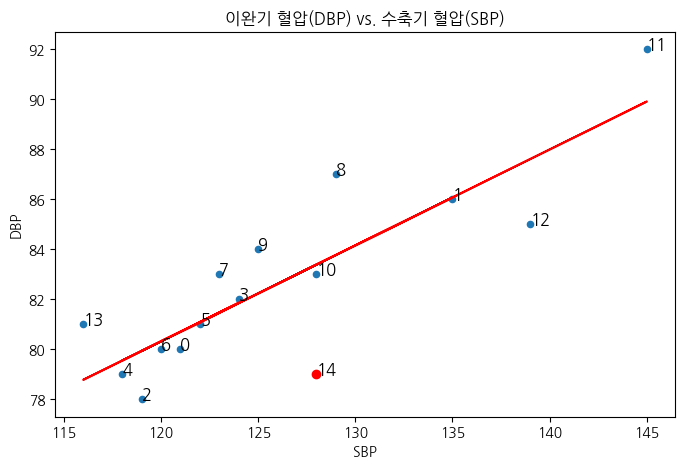

In [46]:
resid_standard=model.resid_pearson
print('Standardized Residuals: \n', resid_standard)
#절대값이 2 이상인 것을 이상치로 정의
outliers=np.where(np.abs(resid_standard)>2)[0]
print('Outliers using Standardized Residuals: \n', df.iloc[outliers])

showOutlier(df,'SBP','DBP', model, outliers)

쿡의 거리
- 표준화 잔차와 레버리지를 동시에 고려
- 1보다 큰 경우 이상치로 판단

Cook's Distance: 
 [6.51577564e-03 1.20262703e-04 6.77521662e-02 2.23219818e-04
 6.36688950e-03 7.53643521e-05 1.51824928e-03 2.48164042e-02
 1.07073379e-01 2.84195672e-02 1.38801893e-03 7.48707680e-01
 3.37060479e-01 1.49678807e-01 1.81580094e-01]
Outliers using Cook's Distance: 
 Empty DataFrame
Columns: [SBP, DBP]
Index: []


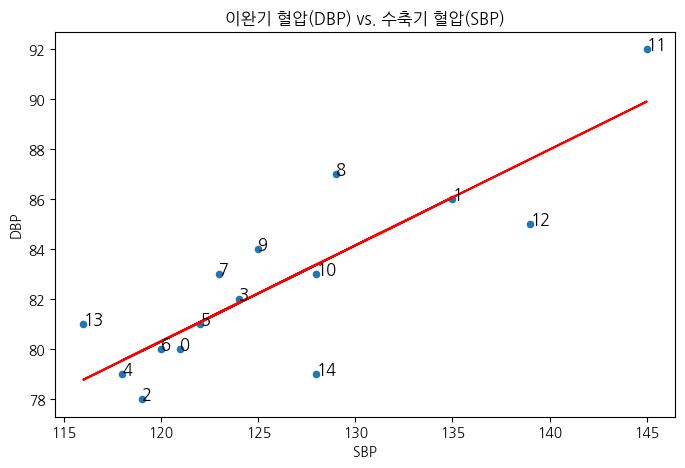

In [48]:
# Cook's distance 계산
(cooks, p) = infl.cooks_distance
print('Cook\'s Distance: \n', cooks)

# Cook's distance가 큰 관측치 확인
outliers = np.where(np.abs(cooks) > 1)[0]
print('Outliers using Cook\'s Distance: \n', df.iloc[outliers])

#이상치 시각화
showOutlier(df,'SBP','DBP',model,outliers)

회귀 모형 관점의 이상치 탐색
- DFFITS
- DFBETAS

DFFITS(difference of fits)
- 모든 관측치를 활용하여 추정된 회귀모형과 해당 관측치를제외한 회귀모형의 예측치 변화 정도를 측정하는 방법
- 자료의 수가 적은 경우 DFFITS 절댓값이 1, 자료의 수가 많은 경우 절댓값이 $2\sqrt(p/n)$ 보다 크면 이상치로 판단
    - p: 독립변수의 수, n: 표본의 크기

DFFITS: 
 [-0.11415582 -0.01550888 -0.36810913  0.02112912 -0.11284405 -0.01227716
 -0.05510443  0.22278422  0.46275994  0.23840959 -0.05268812  1.22368924
 -0.82104869  0.54713583 -0.60262774]
Outliers using DFFITS: 
     SBP  DBP
11  145   92


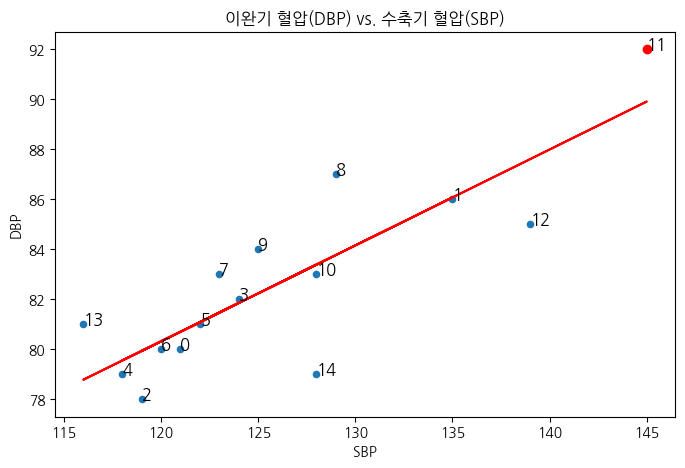

In [49]:
 # DFFITS 계산
(dffits, p) = infl.dffits_internal
print('DFFITS: \n', dffits)

#DFFITS가 큰 관측치 확인
outliers = np.where(np.abs(dffits) > 1) [0]
print('Outliers using DFFITS: \n', df.iloc[outliers])

# 이상치 시각화
showOutlier(df,'SBP','DBP',model,outliers)

DFBETAS(difference of betas)
- 모든 관측치를 활용하여 추정된 회귀모형의 회귀계수와 해당 관측치를 제외한 후 추정된 회귀모형의 회귀계수 변화 정도를
측정하는 방법
- 이 자료의 수가 적은 경우 DFBETAS 절댓값이 1, 자료의 수가 많은 경우 절댓값이 $\frac{2}{\sqrt{n}}$보다 크면 이상치로 판단

- DFBETAS 계산값을 저장하면 절편과 독립변수 별로 값이 계산되는데 데이터 크기는 행 별로 같은 경향성을 띄기 때문에 절댓값을 씌운 후 최댓값을 뽑아낸 것을 대표값으로 정하면 된다.   

DFBETAS: 
 [[-0.06578844  0.06014666]
 [ 0.01049835 -0.0111374 ]
 [-0.26335823  0.24683149]
 [ 0.00651714 -0.0053052 ]
 [-0.08266659  0.07809905]
 [-0.00611958  0.00547875]
 [-0.03509139  0.03254658]
 [ 0.0934841  -0.08094453]
 [-0.14060374  0.17009894]
 [ 0.04814222 -0.03362519]
 [ 0.00858418 -0.01168314]
 [-1.13806242  1.17084337]
 [ 0.7046347  -0.73410612]
 [ 0.45958384 -0.43913888]
 [ 0.12341042 -0.16796258]]
Outliers using DFBETAS: 
     SBP  DBP
11  145   92


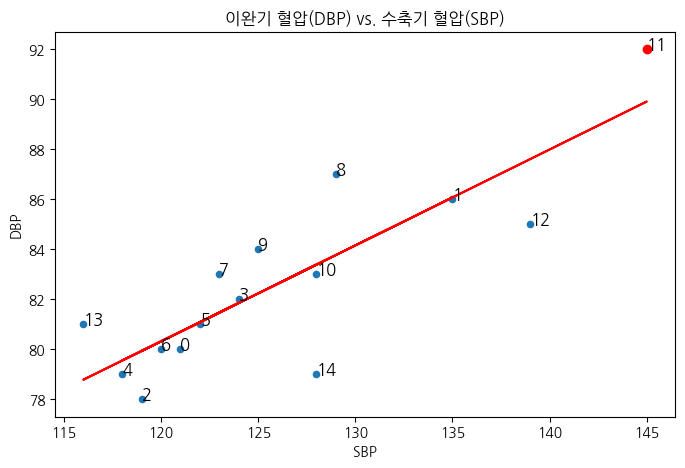

In [50]:
#DFBETAS 계산

dfbetas = infl.dfbetas
print('DFBETAS: \n', dfbetas)

# DFBETAS가 큰 관측치 확인
outliers = np.where(np.abs(dfbetas).max(axis=1) > 1)[0]
print('Outliers using DFBETAS: \n', df.iloc[outliers])

# 이상치 시각화
showOutlier(df,'SBP','DBP',model,outliers)


## 3. 회귀진단 후처리
- 관측치 제거
- 변수의 변환
    - 독립변수(x)의 변환
        - 산점도 형태가 밴드 형태인 경우
    - 종속변수(y)의 변환
        - 산점도 데이터가 고깔 형태인 경우
- 변수의 제거
    - 다중공선성 발생 시 주로 사용함(예측이 목적인 경우는 큰 연관 없음)
- 다른 회귀모형의 사용